# Exercise 3. #

In [1]:
#Imports:
import math
import datetime
import numpy as np
import scipy.signal as sg
import pandas_datareader.data as site
import statsmodels.api as sm
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set start and end dates:
start = datetime.datetime(1960, 1, 1)

#Download and process data from the FRED website:
end = datetime.datetime(2017, 1, 1)
GDP = site.DataReader("GDPC1", "fred", start, end) 
GDP = GDP.resample('3M').mean()
logGDP = np.log(GDP.values)
CON = site.DataReader("PCEC96", "fred", start, end) 
logCON = np.log(CON.values)
INVS = site.DataReader("GPDIC1", "fred", start, end) 
INVS = INVS.resample('3M').mean()
logINVS = np.log(INVS.values)
DEF = site.DataReader("GDPDEF", "fred", start, end) 
DEF = DEF.resample('3M').mean()
logDEF = np.log(DEF.values)

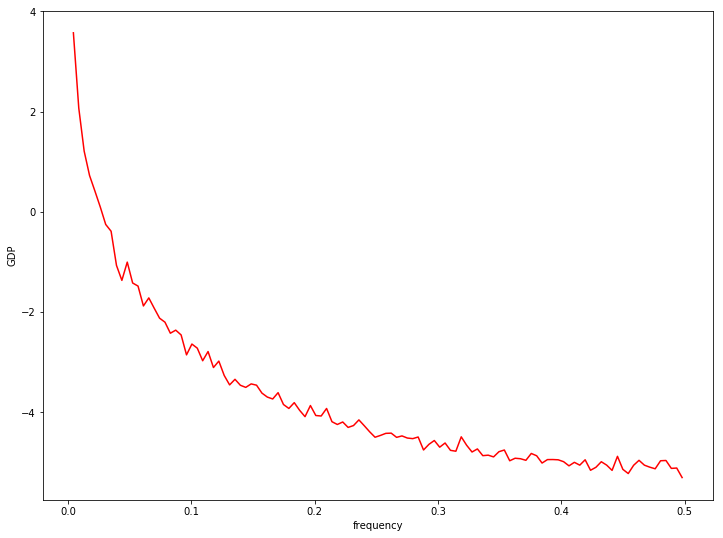

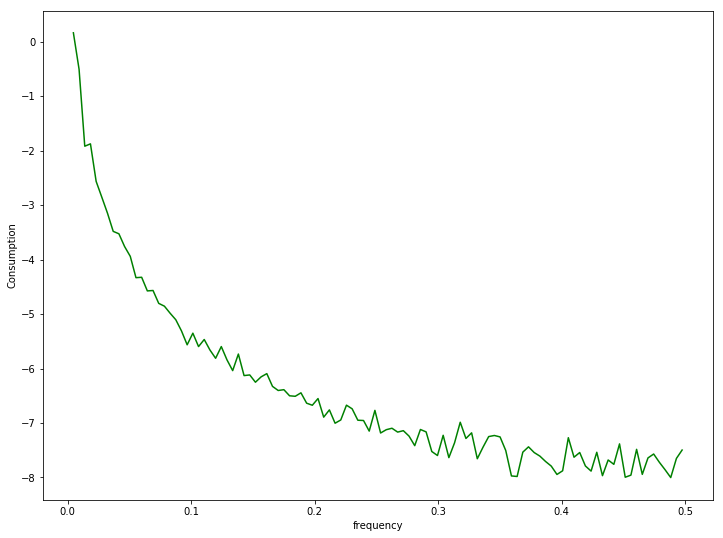

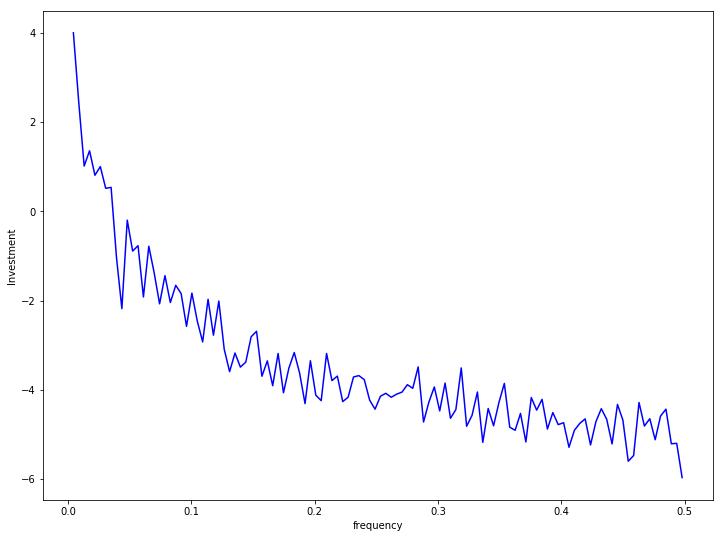

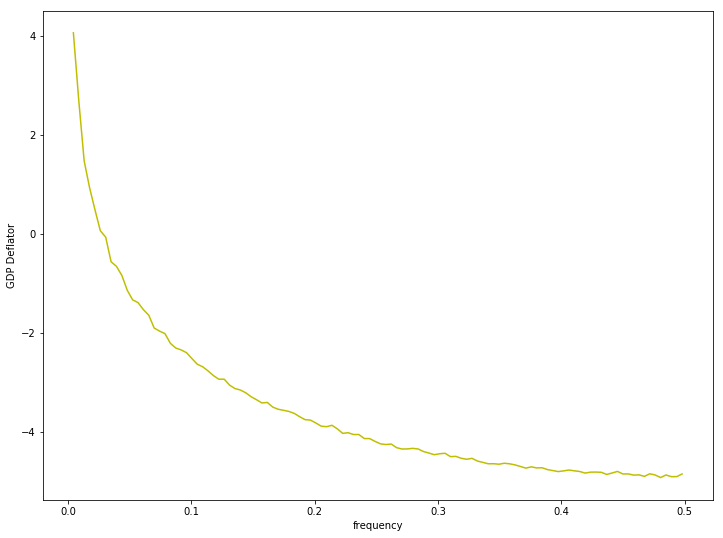

In [3]:
#Get periodograms:
GDPfreq, GDPper = sg.periodogram(logGDP, axis=0)
CONfreq, CONper = sg.periodogram(logCON, axis=0)
INVSfreq, INVSper = sg.periodogram(logINVS, axis=0)
DEFfreq, DEFper = sg.periodogram(logDEF, axis=0)

#Plot figures:
fig = plt.figure(figsize=(12, 9))
plt.plot(GDPfreq[1:], np.log(GDPper[1:]), 'r')
plt.ylabel('GDP')
plt.xlabel('frequency')
plt.show()

fig = plt.figure(figsize=(12, 9))
plt.plot(CONfreq[1:], np.log(CONper[1:]), 'g')
plt.ylabel('Consumption')
plt.xlabel('frequency')
plt.show()

fig = plt.figure(figsize=(12, 9))
plt.plot(INVSfreq[1:], np.log(INVSper[1:]), 'b')
plt.ylabel('Investment')
plt.xlabel('frequency')
plt.show()

fig = plt.figure(figsize=(12, 9))
plt.plot(DEFfreq[1:], np.log(DEFper[1:]), 'y')
plt.ylabel('GDP Deflator')
plt.xlabel('frequency')
plt.show()

# Exercise 4. #

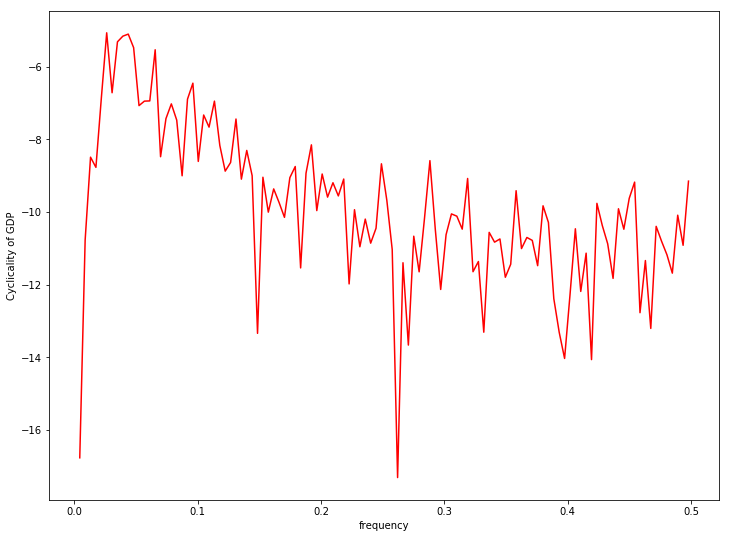

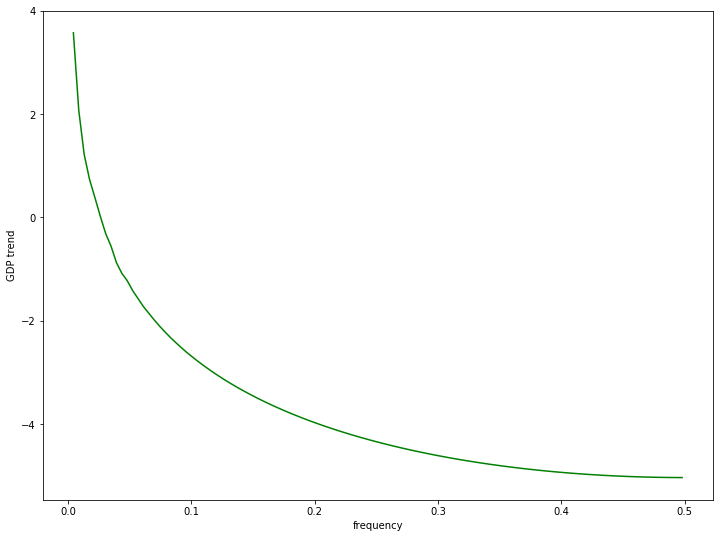

In [4]:
#Get cyclical and trend components from hpfilter:
GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, 1600)

#Plot figures:
GDPfreq, GDPcyper = sg.periodogram(GDPcy, axis=0) #cyclical
fig = plt.figure(figsize=(12, 9))
plt.plot(GDPfreq[1:], np.log(GDPcyper[1:]), 'r')
plt.ylabel('Cyclicality of GDP')
plt.xlabel('frequency')
plt.show()

GDPfreq, GDPcyper = sg.periodogram(GDPtr, axis=0) #trend
fig = plt.figure(figsize=(12, 9))
plt.plot(GDPfreq[1:], np.log(GDPcyper[1:]), 'g')
plt.ylabel('GDP trend')
plt.xlabel('frequency')
plt.show()

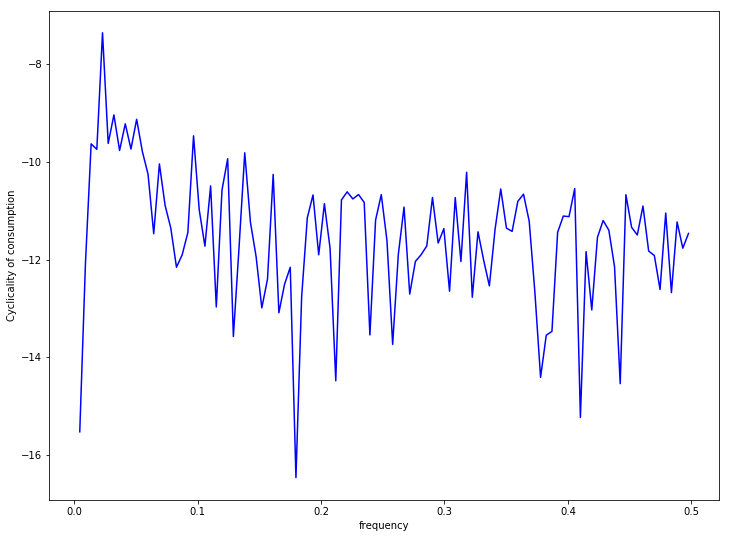

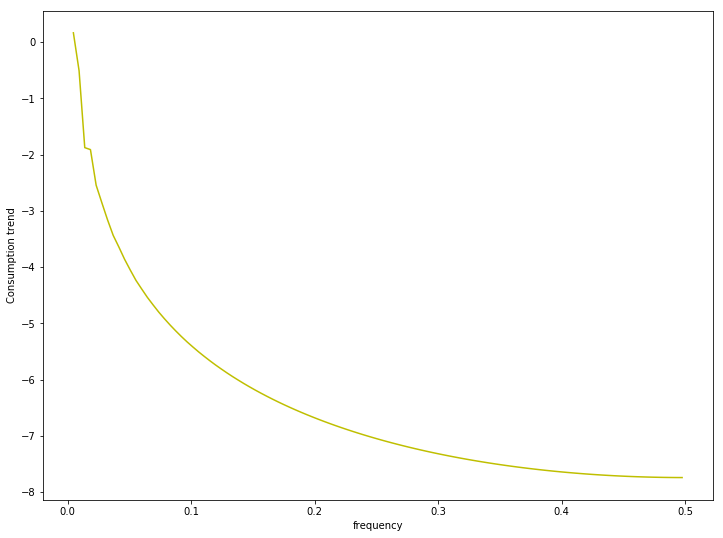

In [5]:
#Get cyclical and trend components from hpfilter:
CONcy, CONtr = sm.tsa.filters.hpfilter(logCON, 1600)

#Plot figures:
CONfreq, CONcyper = sg.periodogram(CONcy, axis=0) #cyclical
fig = plt.figure(figsize=(12, 9))
plt.plot(CONfreq[1:], np.log(CONcyper[1:]), 'b')
plt.ylabel('Cyclicality of consumption')
plt.xlabel('frequency')
plt.show()

CONfreq, CONcyper = sg.periodogram(CONtr, axis=0) #trend
fig = plt.figure(figsize=(12, 9))
plt.plot(CONfreq[1:], np.log(CONcyper[1:]), 'y')
plt.ylabel('Consumption trend')
plt.xlabel('frequency')
plt.show()

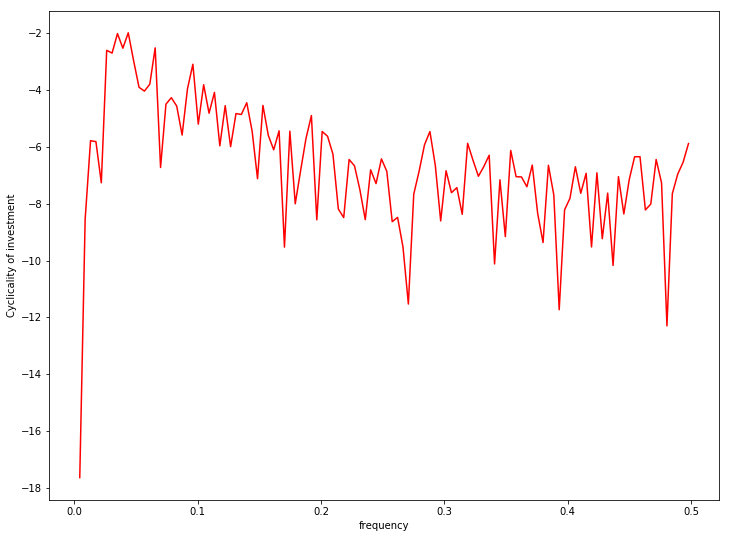

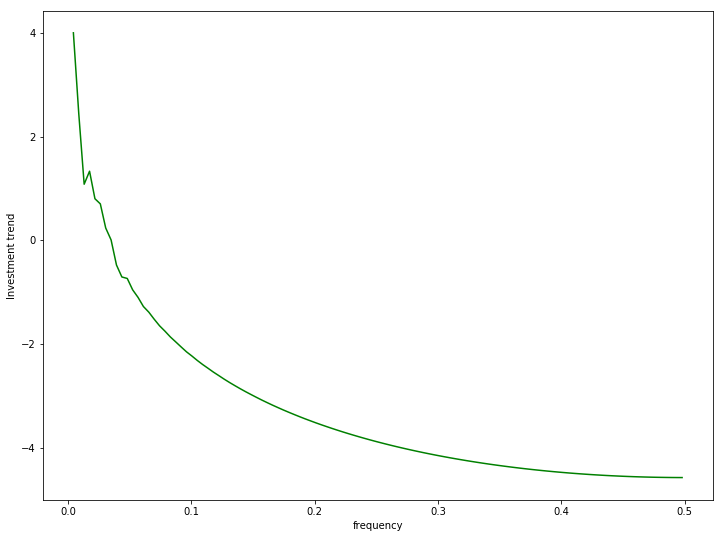

In [6]:
#Get cyclical and trend components from hpfilter:
INVScy, INVStr = sm.tsa.filters.hpfilter(logINVS, 1600)

#Plot figures:
INVSfreq, INVScyper = sg.periodogram(INVScy, axis=0) #cyclical
fig = plt.figure(figsize=(12, 9))
plt.plot(INVSfreq[1:], np.log(INVScyper[1:]), 'r')
plt.ylabel('Cyclicality of investment')
plt.xlabel('frequency')
plt.show()

INVSfreq, INVScyper = sg.periodogram(INVStr, axis=0) #trend
fig = plt.figure(figsize=(12, 9))
plt.plot(INVSfreq[1:], np.log(INVScyper[1:]), 'g')
plt.ylabel('Investment trend')
plt.xlabel('frequency')
plt.show()

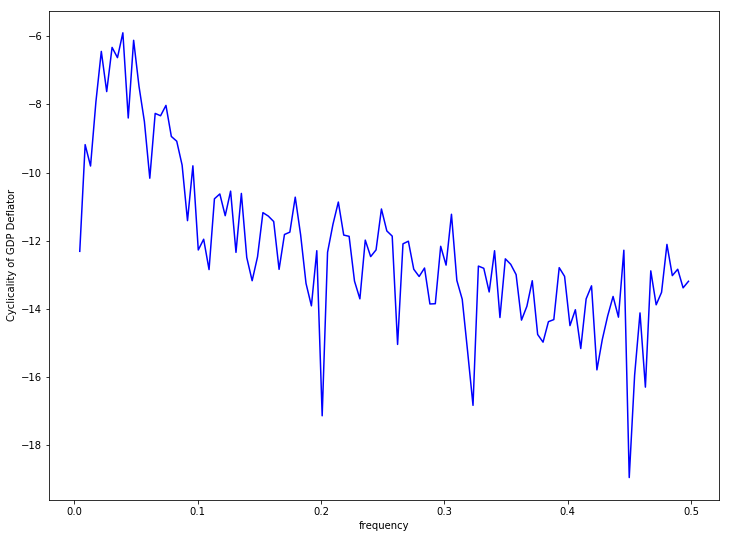

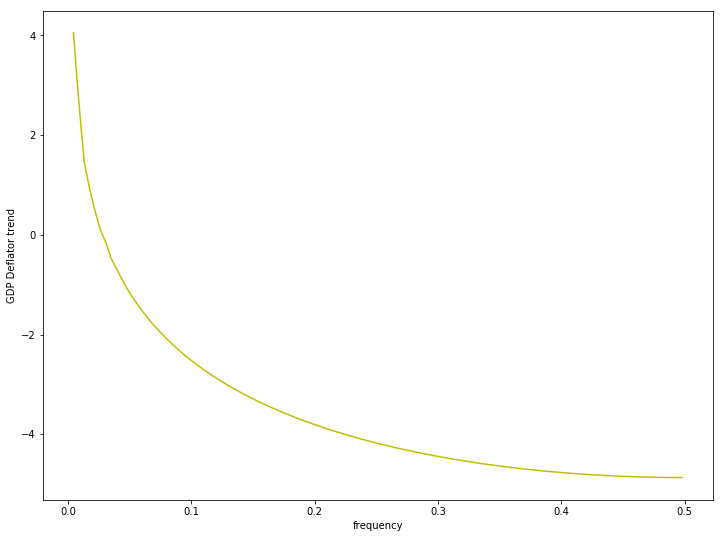

In [7]:
#Get cyclical and trend components from hpfilter:
DEFcy, DEFtr = sm.tsa.filters.hpfilter(logDEF, 1600)

#Plot figures:
DEFfreq, DEFcyper = sg.periodogram(DEFcy, axis=0) #cyclical
fig = plt.figure(figsize=(12, 9))
plt.plot(DEFfreq[1:], np.log(DEFcyper[1:]), 'b')
plt.ylabel('Cyclicality of GDP Deflator')
plt.xlabel('frequency')
plt.show()

DEFfreq, DEFcyper = sg.periodogram(DEFtr, axis=0) #trend
fig = plt.figure(figsize=(12, 9))
plt.plot(DEFfreq[1:], np.log(DEFcyper[1:]), 'y')
plt.ylabel('GDP Deflator trend')
plt.xlabel('frequency')
plt.show()

# Exercise 5 #

In [8]:
#Get lists of lambdas and names:
lambdas = np.array([100, 400, 1600, 6400, 25600])
names = np.array(['GDP', 'Consumption', 'Investment', 'GDP Deflator'])

#Loop over lambdas and names:
for lamb in lambdas:
    
    data = [sm.tsa.filters.hpfilter(logGDP, lamb)[0], sm.tsa.filters.hpfilter(logCON, lamb)[0], 
            sm.tsa.filters.hpfilter(logINVS, lamb)[0], sm.tsa.filters.hpfilter(logDEF, lamb)[0]]
    
    print('Lambda value: ', lamb)
    for i in range(4):
        print('Standard Deviation for {}: '.format(names[i]), np.std(data[i]))
        print('Autocorrelation for {}: '.format(names[i]), np.corrcoef(data[i][:-1], data[i][1:])[0, 1])
        if i == 1:
            print('Correlation of GDP with {}: '.format(names[i]), np.corrcoef(data[i], data[0][12:])[0, 1])
        elif i != 0:
            print('Correlation of GDP with {}: '.format(names[i]), np.corrcoef(data[i], data[0])[0, 1])
            
    print('\n')

Lambda value:  100
Standard Deviation for GDP:  0.00859381844873
Autocorrelation for GDP:  0.687960106218
Standard Deviation for Consumption:  0.00242608312067
Autocorrelation for Consumption:  0.0475162072484
Correlation of GDP with Consumption:  0.0297538745022
Standard Deviation for Investment:  0.0414523078246
Autocorrelation for Investment:  0.634619379215
Correlation of GDP with Investment:  0.89228371474
Standard Deviation for GDP Deflator:  0.00328929606489
Autocorrelation for GDP Deflator:  0.806045221364
Correlation of GDP with GDP Deflator:  -0.300793364298


Lambda value:  400
Standard Deviation for GDP:  0.0114989916571
Autocorrelation for GDP:  0.801978773687
Standard Deviation for Consumption:  0.00272658801322
Autocorrelation for Consumption:  0.235318039281
Correlation of GDP with Consumption:  0.0445935622574
Standard Deviation for Investment:  0.0534548471815
Autocorrelation for Investment:  0.758071290393
Correlation of GDP with Investment:  0.912466962124
Standard 

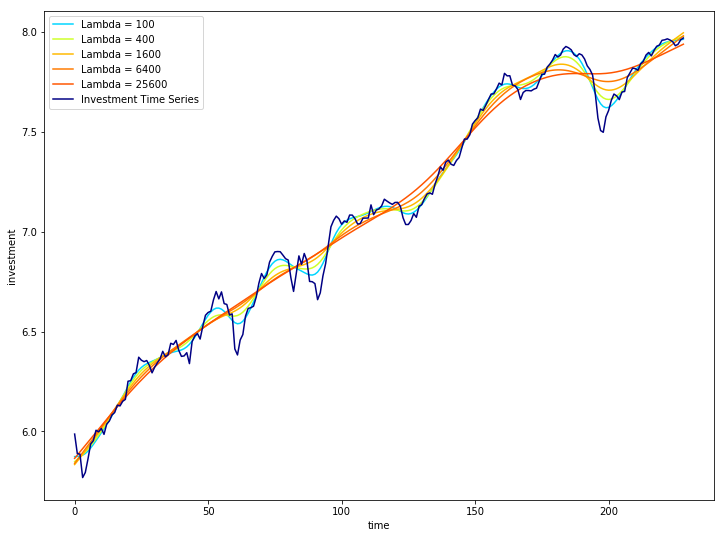

In [9]:
import matplotlib

lambdas = np.array([100, 400, 1600, 6400, 25600])

fig = plt.figure(figsize=(12, 9))

for i in range(5):
    INVScy, INVStr = sm.tsa.filters.hpfilter(logINVS, lambdas[i])
    plt.plot(INVStr, color=plt.cm.jet(1 - 1 / (1.5 + i)), label='Lambda = {}'.format(lambdas[i]))
    
plt.plot(logINVS, color=plt.cm.jet(1), label = 'Investment Time Series')
plt.ylabel('investment')
plt.xlabel('time')
plt.legend()
plt.show()

# Exercise 6. #

In [10]:
#Download and process data from the FRED website:
start = datetime.datetime(1960, 1, 1) 
end = datetime.datetime(2017, 1, 1)
GOVS = site.DataReader("W068RCQ027SBEA", "fred", start, end) #Government Spending
GOVS = GOVS.resample('3M').mean()
logGOVS = np.log(GOVS.values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
NETEX = site.DataReader("NETEXP", "fred", start, end) #Net Exports
NETEX = NETEX.resample('3M').mean()
logNETEX = NETEX.values/GDP.values

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
EXPGSC1 = site.DataReader("EXPGSC1", "fred", start, end) #Exports
EXPGSC1 = EXPGSC1.resample('3M').mean()
logEXPGSC1 = np.log(EXPGSC1.values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
IMP = site.DataReader("B021RX1Q020SBEA", "fred", start, end) #Imports
IMP = IMP.resample('3M').mean()
logIMP = np.log(IMP.values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
EMP = site.DataReader("LREM25TTUSQ156N", "fred", start, end) #Employment
EMP = EMP.resample('3M').mean()
logEMP = np.log(EMP.values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
HOURS = site.DataReader("HOHWMN02USQ065S", "fred", start, end) #Weekly Hours
HOURS = HOURS.resample('3M').mean()
logHOURS = np.log(HOURS.values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
LABPARP = site.DataReader("CIVPART", "fred", start, end) #Participation Labor Rate
LABPARP  = LABPARP .resample('3M').mean()
logLABPARP  = np.log(LABPARP .values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
UNEMP = site.DataReader("UNRATE", "fred", start, end) #Unemployment Rate
UNEMP = UNEMP.resample('3M').mean()
logUNEMP = np.log(UNEMP.values)

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
LAB = site.DataReader("CLF16OV", "fred", start, end) #Labor Force
LAB = LAB.resample('3M').mean()
logLAB = np.log(LAB.values)

logLABPROD = np.log(GDP.values / (LAB.values * HOURS.values)) #Labor Productivity

#Even more statistics:
NomW = site.DataReader("A576RC1", "fred", start, end)
NomW = NomW.resample('3M').mean()
logNomW = np.log(NomW.values)

FFRate = site.DataReader("FEDFUNDS", "fred", start, end)
FFRate = FFRate.resample('3M').mean()
logFFRate = np.log(FFRate.values)

MS = site.DataReader("M2SL", "fred", start, end)
MS = MS.resample('3M').mean()
logMS = np.log(MS.values)

CPI = site.DataReader("CPIAUCSL", "fred", start, end)
CPI = CPI.resample('3M').mean()
logCPI = np.log(CPI.values)

RealW = NomW.values / CPI.values
logRealW = np.log(RealW)

RealI = FFRate.values / CPI.values
logRealI = np.log(RealI)

RealMS = MS.values / CPI.values
logRealMS = np.log(RealMS)

In [13]:
#Shorthand for some basic functions:
HP = lambda x: sm.tsa.filters.hpfilter(x, 1600)[0]
FD = lambda x: np.diff(x)
BP = lambda x: sm.tsa.filters.bkfilter(x)
LT = lambda x: sg.detrend(x, type = "linear")

methods = [HP, FD, BP, LT]
method_names = ["HP", "First Differencing", "BP", "LT"]

#Lists of variables and names:
variables = [logGDP, logCON, logINVS, logGOVS, logNETEX, logEXPGSC1, 
             logIMP, logEMP, logHOURS, logLAB, logNomW, logRealW, 
             logFFRate, logRealI, logMS, logRealMS, logDEF, logCPI, 
             logLABPROD, logUNEMP, logLABPARP]

names = ["Real GDP", "Consumption", "Investment", "Govt. Spend", "Net Exports", "Exports", 
         "Imports", "Employment", "Hours Worked", "Total Labor", "Nominal Wages", "Real Wages", 
         "Nominal I/R", "Real I/R", "Nominal MS", "Real MS", "GDP Deflator", "CP Index", 
         "Labor Prod.", "Unemployment", "Participation"]

#Header of the table:
print("Variable \t Standard Deviation \t Relative to GDP \t Auto-Correlation \t Correlation w GDP \n")

#Loop over methods and variables:
for m in range (0, len(methods)):
    print('Filter Method: ', str(method_names[m]))
    data_len = len(logGDP)
    temp_data = logGDP.reshape((1,data_len))[0]
    GDPcy = methods[m](temp_data)
    GDPcy_std = np.std(GDPcy)
    GDPrel = GDPcy_std/GDPcy_std
    GDPcy_auto = np.corrcoef(GDPcy[:-1], GDPcy[1:])[0, 1]
    GDPcy_corr = np.corrcoef(GDPcy, GDPcy)[0, 1]
    print("Real GDP \t\t", round(GDPcy_std,3), "\t\t\t", round(GDPrel,3), "\t\t\t", round(GDPcy_auto,3), "\t\t\t", round(GDPcy_corr,3))
    for i in range (1, len(variables)):
        data_len = len(variables[i])
        temp_data = variables[i].reshape((1,data_len))[0]
        if names[i] == "Consumption":
            cy = methods[m](temp_data)
            cy_std = np.std(cy)
            cy_rel = cy_std / GDPcy_std
            cy_auto = np.corrcoef(cy[:-1], cy[1:])[0, 1]
            cy_corr = np.corrcoef(cy, GDPcy[12:])[0, 1]
        elif names[i] == "Imports":
            cy = methods[m](temp_data)
            cy_std = np.std(cy)
            cy_rel = cy_std / GDPcy_std
            cy_auto = np.corrcoef(cy[:-1], cy[1:])[0, 1]
            cy_corr = np.corrcoef(cy, GDPcy[7:])[0, 1]
        else:
            cy = methods[m](temp_data)
            cy_std = np.std(cy)
            cy_rel = cy_std / GDPcy_std
            cy_auto = np.corrcoef(cy[:-1], cy[1:])[0, 1]
            cy_corr = np.corrcoef(cy, GDPcy)[0, 1]
        print(str(names[i]), "\t\t", round(cy_std,3), "\t\t\t", round(cy_rel,3), "\t\t\t", round(cy_auto,3), "\t\t\t", round(cy_corr,3))
    print("\n")

Variable 	 Standard Deviation 	 Relative to GDP 	 Auto-Correlation 	 Correlation w GDP 

Filter Method:  HP
Real GDP 		 0.015 			 1.0 			 0.866 			 1.0
Consumption 		 0.003 			 0.236 			 0.52 			 0.125
Investment 		 0.066 			 4.513 			 0.831 			 0.904
Govt. Spend 		 0.017 			 1.186 			 0.78 			 -0.473
Net Exports 		 0.003 			 0.199 			 0.783 			 -0.469
Exports 		 0.042 			 2.838 			 0.664 			 0.433
Imports 		 0.049 			 3.337 			 0.784 			 0.07
Employment 		 0.01 			 0.662 			 0.502 			 0.667
Hours Worked 		 0.009 			 0.612 			 0.783 			 0.732
Total Labor 		 0.004 			 0.251 			 0.731 			 0.235
Nominal Wages 		 0.016 			 1.077 			 0.888 			 0.534
Real Wages 		 0.018 			 1.211 			 0.894 			 0.806
Nominal I/R 		 0.38 			 25.899 			 0.875 			 0.386
Real I/R 		 0.377 			 25.691 			 0.875 			 0.405
Nominal MS 		 0.013 			 0.878 			 0.879 			 0.275
Real MS 		 0.022 			 1.475 			 0.905 			 0.436
GDP Deflator 		 0.008 			 0.519 			 0.94 			 -0.469
CP Index 		 0.012 			 0.813 			 0.917 			 -0.494